# Exploratory Data Analysis of Medical Expenses

## Objective: To perform exploratory data analysis on the dataset and have an overview of underlying insights.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing dataset
df_med  =  pd.read_csv('https://raw.githubusercontent.com/raviteja-padala/Datasets/main/med_exp.csv')
df_med.head()


,Age,Gender,Cold,Cough,Fever,BP,Diabetes,Thyroid,Arthritis,Acidity,Others,Expense
0,36,M,no,no,no,yes,yes,no,no,no,no,433
1,37,M,no,no,no,yes,yes,no,no,no,no,427
2,38,M,no,no,no,yes,yes,no,no,no,no,421
3,39,M,no,no,no,yes,yes,no,no,no,no,444
4,40,M,no,no,no,yes,yes,no,no,no,no,427


# Dataset information

- The dataset contains medical expenses of individuals against different medical conditions.


* Age	- This column represents the age of the individuals.
* Gender- This column indicates the gender of the individuals.
* Cold	- This column represent the presence or absence of cold
* Cough	- This column represent the presence or absence of cough
* Fever - This column represent the presence or absence of fever
* BP	-  This column indicates whether the individuals have a of high blood pressure
* Diabetes	- This column indicates whether the individuals have diabetes.
* Thyroid	 - This column represents whether the individuals have thyroid-related issues.
* Arthritis	- This column indicates whether the individuals have arthritis.
* Acidity	- his column represents whether the individuals have acidity issues.
* Others	- This column represents other medical condition or health issue.
* Expense - This column represents medical expense or cost incurred by the individuals per month in rupees.

#  Data Checks to perform
Check Missing values <br>
Check the number of unique values of each column <br>
Check statistics of data set <br>
Check various categories present in the different categorical column

# Check data types

In [ ]:
# #checking info dataset
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        799 non-null    int64 
 1   Gender     799 non-null    object
 2   Cold       796 non-null    object
 3   Cough      797 non-null    object
 4   Fever      797 non-null    object
 5   BP         798 non-null    object
 6   Diabetes   799 non-null    object
 7   Thyroid    799 non-null    object
 8   Arthritis  799 non-null    object
 9   Acidity    799 non-null    object
 10  Others     791 non-null    object
 11  Expense    799 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 75.0+ KB


In [ ]:
df_med.describe()

,Age,Expense
count,799.000000,799.000000
mean,48.643304,354.817272
std,26.963526,251.157589
min,1.000000,51.000000
25%,31.000000,145.000000
50%,51.000000,300.000000
75%,71.000000,550.000000
max,91.000000,1700.000000


*Observation* :  <br>
- The age of individuals in the dataset ranges from 1 to 91 with mean age being 48.6.
- Expenses ranges from 51 to 1700 with mean values of 354.8



# Check Missing values

In [ ]:
df_med.isnull().sum()

Age          0
Gender       0
Cold         3
Cough        2
Fever        2
BP           1
Diabetes     0
Thyroid      0
Arthritis    0
Acidity      0
Others       8
Expense      0
dtype: int64

# Handling missing values

In [ ]:
#creatting a copy of original dataset
df = df_med.copy()
df.head()

,Age,Gender,Cold,Cough,Fever,BP,Diabetes,Thyroid,Arthritis,Acidity,Others,Expense
0,36,M,no,no,no,yes,yes,no,no,no,no,433
1,37,M,no,no,no,yes,yes,no,no,no,no,427
2,38,M,no,no,no,yes,yes,no,no,no,no,421
3,39,M,no,no,no,yes,yes,no,no,no,no,444
4,40,M,no,no,no,yes,yes,no,no,no,no,427


In [ ]:
df_med.isna().sum().sum()

16

In [ ]:
df.isna().sum().sum()

16

In [ ]:
df.isna().sum()

Age          0
Gender       0
Cold         3
Cough        2
Fever        2
BP           1
Diabetes     0
Thyroid      0
Arthritis    0
Acidity      0
Others       8
Expense      0
dtype: int64

*Observation* :<br> There are missing values in cold, cough, fever, BP, others columns in the dataset

In [ ]:
#we will perform mode imputation of na values so checking mode
df['Others'].mode()

0    no
Name: Others, dtype: object

In [ ]:
df['Others'].mode()[0]

'no'

In [ ]:
# mode imputation of na values
df['Cold']= df['Cold'].fillna(df['Others'].mode()[0])
df['Cough']= df['Cough'].fillna(df['Others'].mode()[0])
df['Fever']= df['Fever'].fillna(df['Others'].mode()[0])
df['BP']= df['BP'].fillna(df['Others'].mode()[0])
df['Others'] = df['Others'].fillna(df['Others'].mode()[0])

In [ ]:
#checking null values after handling null values
df['Others'].isna().sum()

0

# Categorical and Numerical features

In [ ]:
#Dividing Categorical and continous columns

categorical_features = []
continous_features = []

for feature in df:
    print("--------------------")
    print(f"{feature} : {df[feature].unique()}")

    if len(df[feature].unique()) <= 5:
        categorical_features.append(feature)
    else:
        continous_features.append(feature)

--------------------
Age : [36 37 38 39 40 41 42 43 44 45  1  2  3 31 32 33 34 35  4  5  6  7 55 56
 57 58 59 60 61 62 63 64 65  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 51 71 81 91 52 53 54 66 67 68 69 70 72 73 74 75
 76 77 78 79 80 82 83 84 85 86 87 88 89 90 46 47 48 49 50]
--------------------
Gender : ['M' 'F']
--------------------
Cold : ['no' 'yes']
--------------------
Cough : ['no' 'yes']
--------------------
Fever : ['no' 'yes']
--------------------
BP : ['yes' 'no']
--------------------
Diabetes : ['yes' 'no']
--------------------
Thyroid : ['no' 'yes']
--------------------
Arthritis : ['no' 'yes']
--------------------
Acidity : ['no' 'yes']
--------------------
Others : ['no' 'yes']
--------------------
Expense : [ 433  427  421  444  440  455  465  470  174  179  550  430   73  104
   67  164  720  590  411  425  434  189  560  305  350  250  450  920
  551  150  220  125   88  200  501   51   75  100  300  380  650  670
  750  570  422   83  114

# Unique values in each column

In [ ]:
df.nunique()

# Count of Unique values in each column

In [ ]:
for i in df[categorical_features]:

  print(f"Value counts of {i}")
  print(f"{df[i].value_counts()}")
  print('='*35)
  print('\n')

Value counts of Gender
M    432
F    367
Name: Gender, dtype: int64


Value counts of Cold
no     628
yes    171
Name: Cold, dtype: int64


Value counts of Cough
no     570
yes    229
Name: Cough, dtype: int64


Value counts of Fever
no     577
yes    222
Name: Fever, dtype: int64


Value counts of BP
no     555
yes    244
Name: BP, dtype: int64


Value counts of Diabetes
no     539
yes    260
Name: Diabetes, dtype: int64


Value counts of Thyroid
no     624
yes    175
Name: Thyroid, dtype: int64


Value counts of Arthritis
no     659
yes    140
Name: Arthritis, dtype: int64


Value counts of Acidity
no     623
yes    176
Name: Acidity, dtype: int64


Value counts of Others
no     466
yes    333
Name: Others, dtype: int64




# Plotting value counts in each column

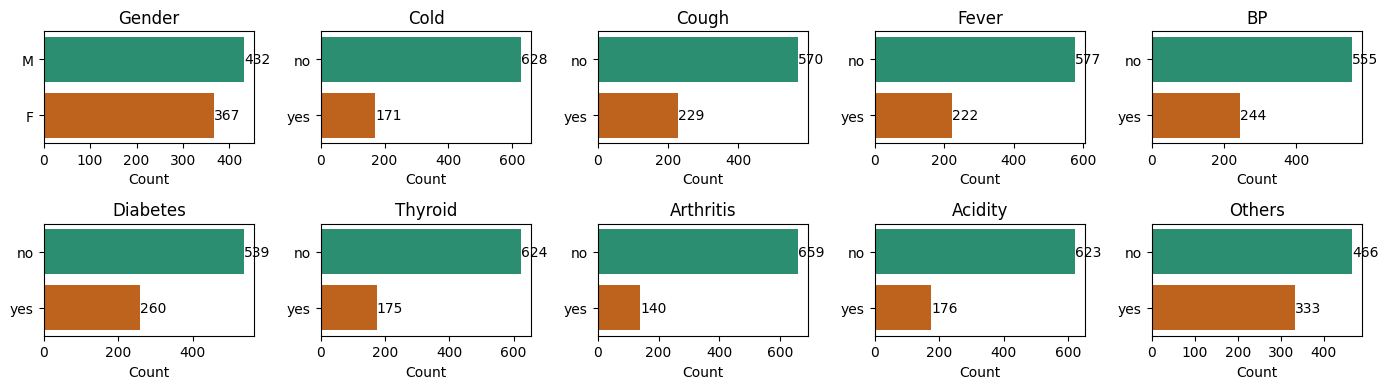

In [ ]:

# Relationship between independent features and OUTCOME feature
plt.figure(figsize=(14, 4))

mpl_palette_name = 'Dark2'

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 5, i + 1)

    bars = df[feature].value_counts()
    sns.barplot(x=bars.values, y=bars.index, palette=sns.palettes.mpl_palette(mpl_palette_name))

    plt.title("{}".format(feature))
    plt.xlabel("Count")
    plt.ylabel("")

    # Add data labels to the bars
    for index, value in enumerate(bars.values):
        plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()


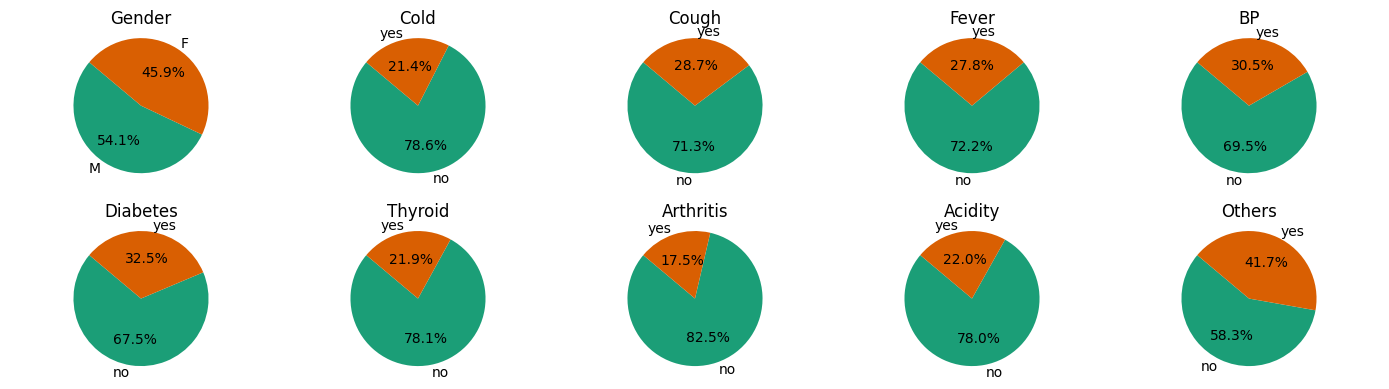

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between independent features and OUTCOME feature
plt.figure(figsize=(14, 4))

mpl_palette_name = 'Dark2'

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 5, i + 1)

    bars = df[feature].value_counts()
    colors = sns.palettes.mpl_palette(mpl_palette_name, len(bars))

    plt.pie(bars.values, labels=bars.index, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

    plt.title("{}".format(feature))

plt.tight_layout()
plt.show()


*Observation:*<br>
- The plot of gender suggests that the dataset contains a relatively balanced representation of both genders.
- Percentage of individuals dealing with BP, Diabetes , others are more compared to other columns.

# Age vs Expense

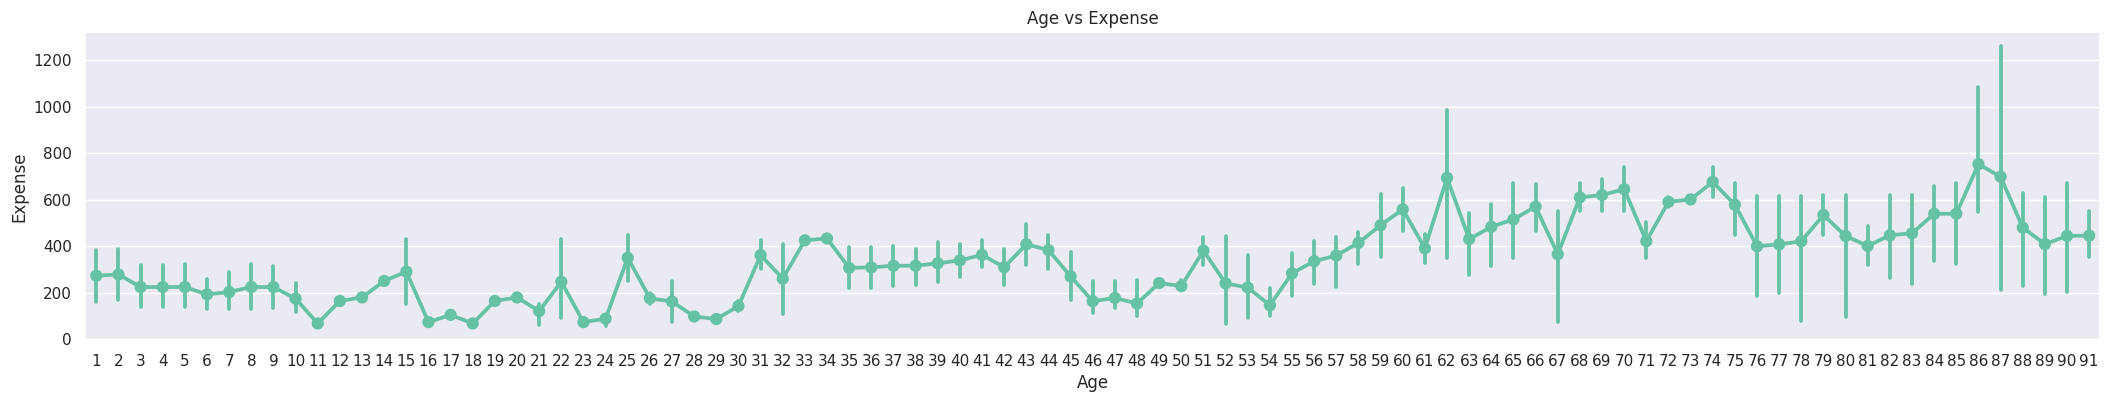

In [ ]:
#plotting chart between age and target column

sns.set(style='darkgrid',palette='Set2') # set background and palette
#sns.set(font_scale=2)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(26, 4))

# grouped by a categorical variable
sns.pointplot(x='Age', y='Expense', data=df).set(title="Age vs Expense")
plt.show()

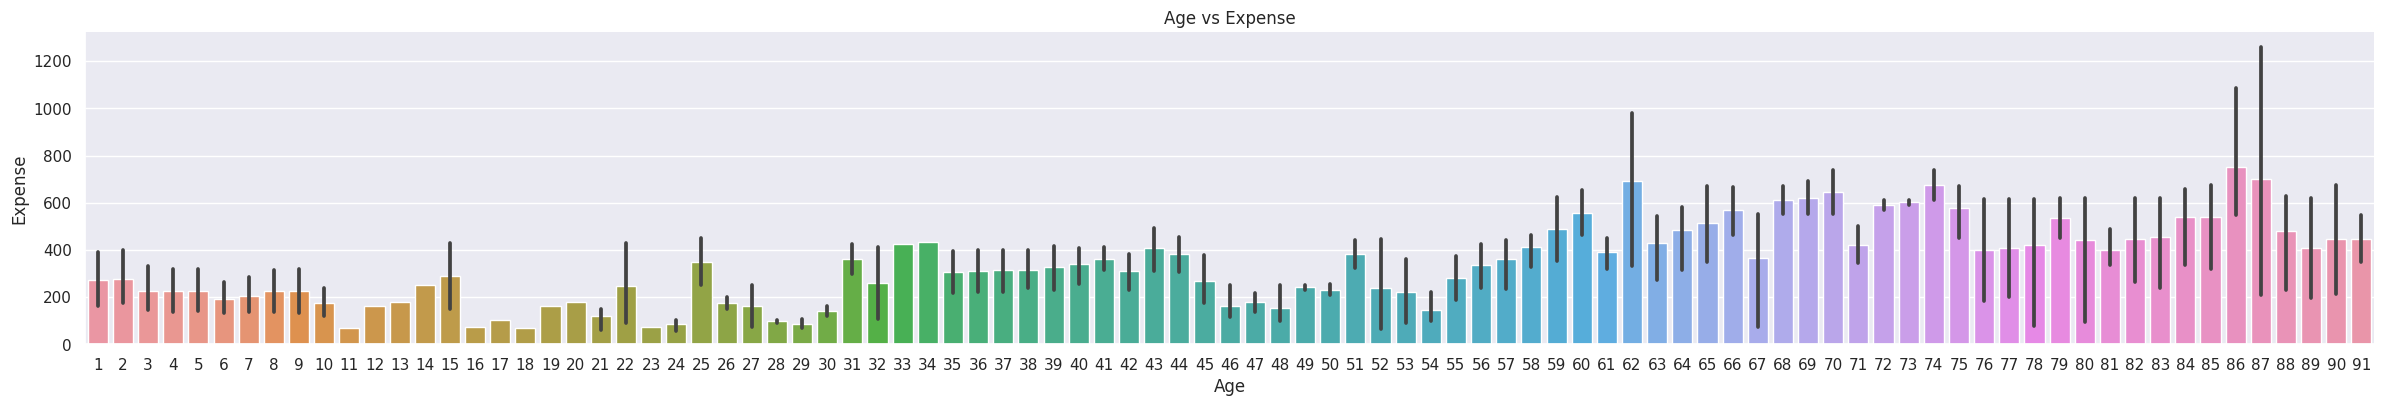

In [ ]:
#relation between age and target

sns.catplot(x='Age', y='Expense', data=df, kind='bar',height=4, aspect=6).set(title="Age vs Expense")
plt.show()

*Observation:*<br>
* Medicals expenses increased with increase in age.

# Medical condition vs Expense

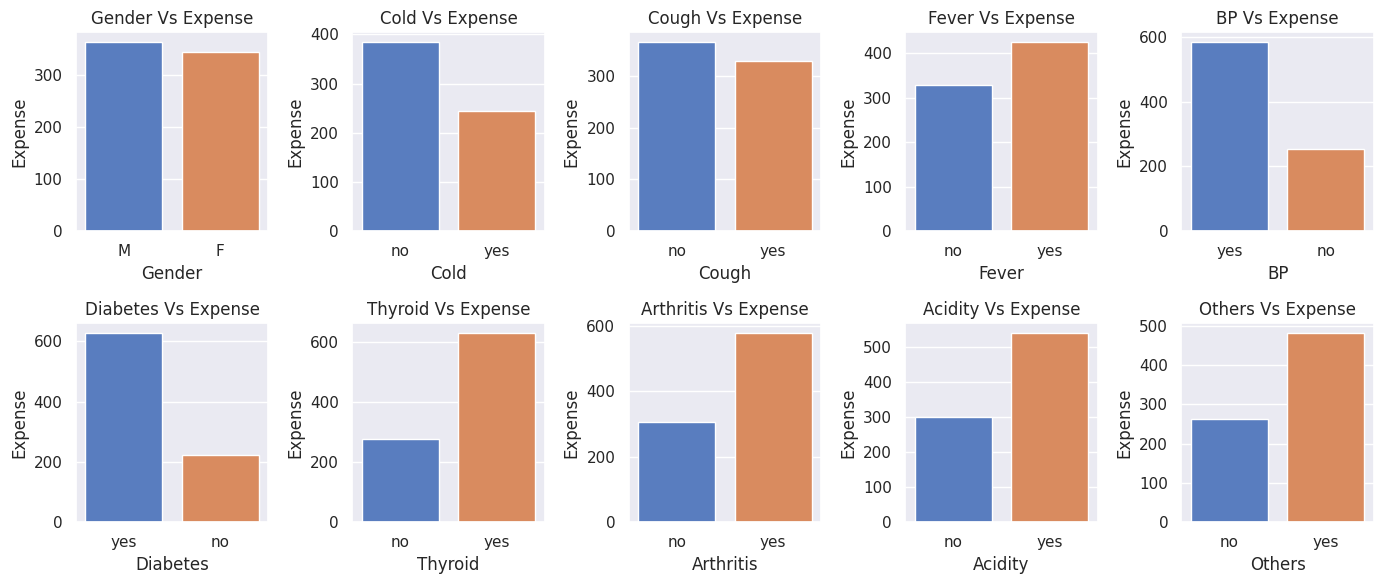

In [ ]:
# Relationship between independent features and OUTCOME feature
plt.figure(figsize=(14, 6))  # Decrease the figure height here (e.g., 15x6)

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 5, i + 1)

    sns.barplot(data=df, x=feature, y='Expense', ci=None, palette="muted")
    plt.title("{} Vs Expense".format(feature))

plt.tight_layout()
plt.show()

*Observation:*<br>
* Medicals expenses with Bp, Diabetes, Thyroid, Arthritis are more compared to others.

#Gender vs Medical condition

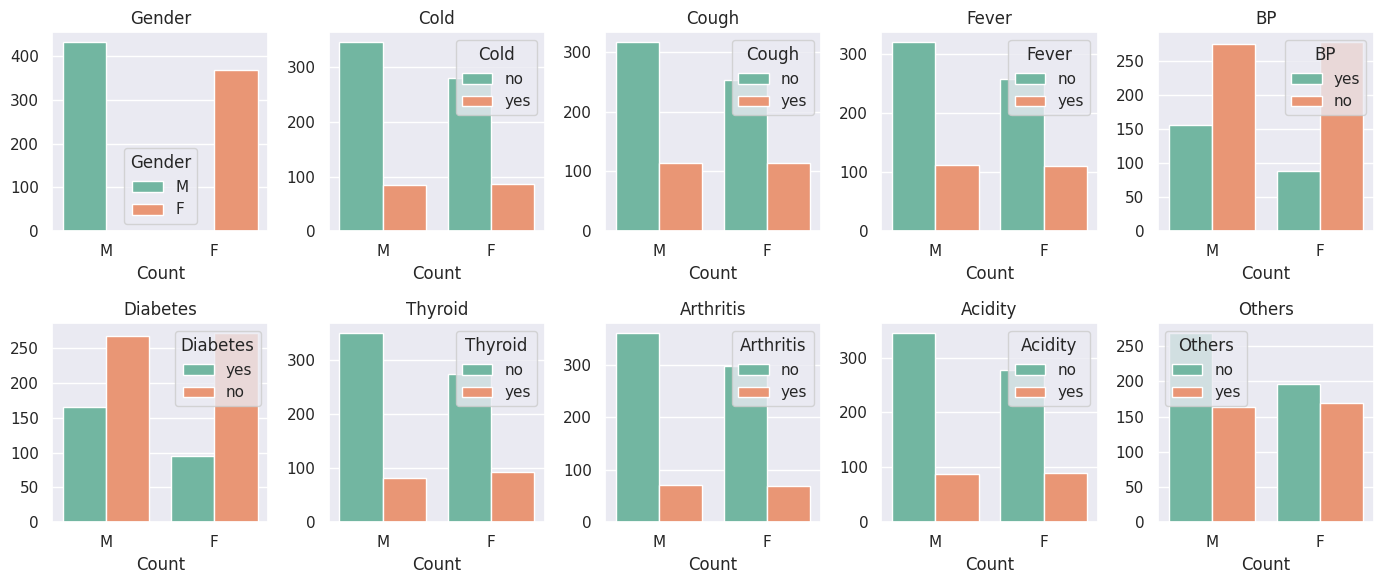

In [ ]:
#from matplotlib.legend import Legend

# Relationship between independent features and OUTCOME feature
plt.figure(figsize=(14, 6))

mpl_palette_name = 'Dark2'

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 5, i + 1)

    # Grouped Bar Plot - Comparing 'Cold' and 'Cough' distribution across 'Gender'
    sns.countplot(data=df, x='Gender', hue=feature, palette='Set2')

    plt.title("{}".format(feature))
    plt.xlabel("Count")
    plt.ylabel("")
    # Remove the legend
    #plt.legend().remove()


plt.tight_layout()
plt.show()

*Observation:*<br>
- Male and female have almost equal distribution of medical conditions.

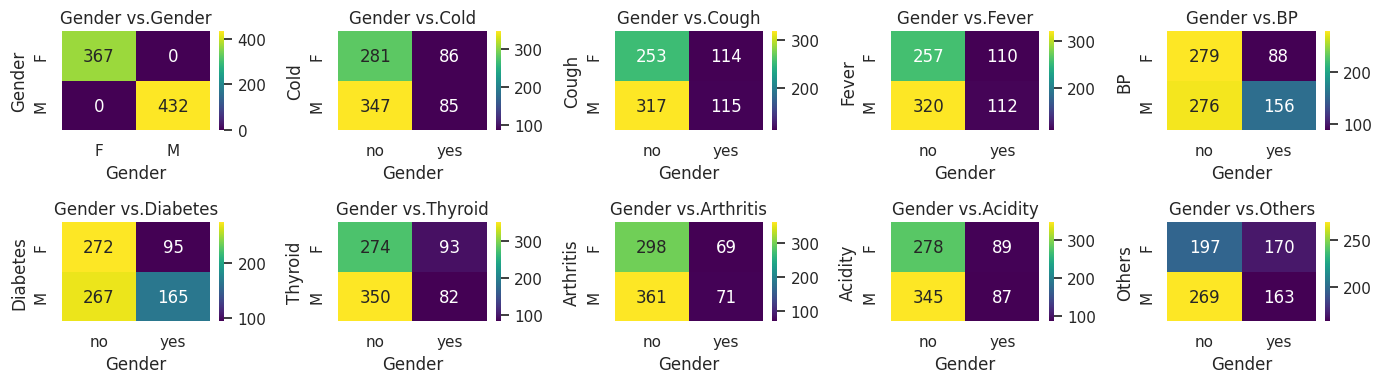

In [ ]:
#from matplotlib.legend import Legend

# Relationship between independent features and OUTCOME feature
plt.figure(figsize=(14, 4))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 5, i + 1)

    # Create a crosstab of 'Gender' and the current feature
    crosstab_data = pd.crosstab(df['Gender'], df[feature])

    # Plot the crosstab data using a heatmap
    sns.heatmap(crosstab_data, annot=True, cmap='viridis', fmt='d')

    plt.title(f'Gender vs.{feature}')
    plt.xlabel('Gender')
    plt.ylabel(feature)


plt.tight_layout()
plt.show()

*Observation:*<br>
- Male and female have almost equal distribution of medical conditions but with help of crosstab we can view that BP, Diabetes are more in male individuals.

# Comparision of Gender vs expenses

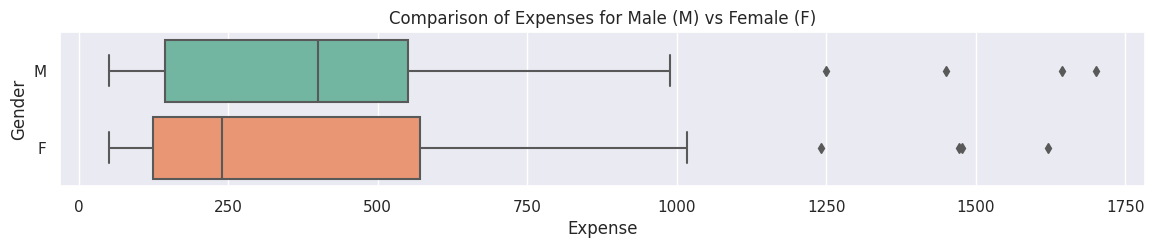

In [ ]:
# Create a box plot to compare expenses for Male (M) vs Female (F)
plt.figure(figsize=(14, 2))
sns.boxplot(data=df, y='Gender', x='Expense', orient='h')
plt.title('Comparison of Expenses for Male (M) vs Female (F)')
plt.ylabel('Gender')
plt.xlabel('Expense')
plt.show()

*Observation:*<br>
- Expenses distribution for females is more compared to that of males, but male individuals have high expense outliers.

In [ ]:
# Calculate the total expense for males (M) and females (F)
total_expense_by_gender = df.groupby('Gender')['Expense'].sum()
print(total_expense_by_gender)

Gender
0    126456
1    157043
Name: Expense, dtype: int64

*Observation:*<br>
- Total Medical expenses of the male individuals is more compared to that of females in the dataset.

# Distribution of Age and Expense

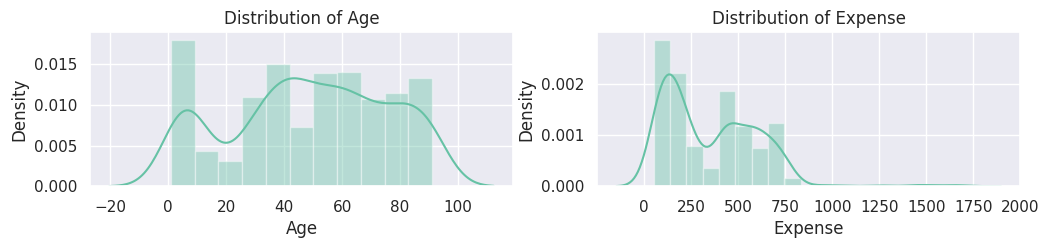

In [ ]:
#plotting distibution of Age
plt.figure(figsize=(12, 2))

plt.subplot(1, 2, 1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')

#plotting distibution of Expense
plt.subplot(1, 2, 2)
sns.distplot(df['Expense'])
plt.title('Distribution of Expense')

plt.show()

*Observation:*<br>
- Distribution of Age is almost even throught the dataset with some exceptions in the begining, Distribution of Expenses is centered around 100 rupees to 750 rupees.

# Insights from the data:

1. Gender:
   - There are two categories in the "Gender" variable: Male (M) and Female (F).
   - The value count for "Male" is 432 in the dataset and the value count for "Female" is 367 in the dataset.
   - This suggests that the dataset contains a relatively balanced representation of both genders.

2. Cold:
   - The "Cold" variable has two categories: "No" and "Yes," indicating the presence or absence of a cold.
   - The value count for "No" is 628 and The value count for "Yes" is 171.
   - This shows that a significant number of individuals in the dataset do not have a cold compared to those who do.

3. Cough:

   - The value count for "No" is 570 and the value count for "Yes" is 229 in the dataset.
   - This suggests that the number of individuals without a cough is relatively higher compared to those with a cough.

4. Fever:
   
   - The value count for "No" is 577, which means there are 577 instances where the individual does not have a fever.
   - The value count for "Yes" is 222, indicating that there are 222 instances where the individual has a fever.
   

5. BP (Blood Pressure):
   - The "BP" variable has two categories: "No" and "Yes," likely indicating the presence or absence of high blood pressure.
   - The value count for "No" is 555, meaning there are 555 instances where the individual does not have high blood pressure.
   - The value count for "Yes" is 244, indicating that there are 244 instances where the individual has high blood pressure.
  

6. Diabetes:

   - The value count for "No" is 539, meaning there are 539 instances where the individual does not have diabetes.
   - The value count for "Yes" is 260, indicating that there are 260 instances where the individual has diabetes.
  

7. Thyroid:
  
   - The value count for "No" is 624, meaning there are 624 instances where the individual does not have thyroid-related issues.
   - The value count for "Yes" is 175, indicating that there are 175 instances where the individual has thyroid-related issues.


8. Arthritis:
   
   - The value count for "No" is 659, meaning there are 659 instances where the individual does not have arthritis.
   - The value count for "Yes" is 140, indicating that there are 140 instances where the individual has arthritis.

9. Acidity:

   - The value count for "No" is 623, meaning there are 623 instances where the individual does not have acidity-related issues.
   - The value count for "Yes" is 176, indicating that there are 176 instances where the individual has acidity-related issues.

10. Others:
    
    - The value count for "No" is 466, meaning there are 466 instances where the individual does not have these other medical conditions.
    - The value count for "Yes" is 333, indicating that there are 333 instances where the individual has these other medical conditions.
    - This shows that there is a relatively even distribution of instances between individuals without and with these other medical conditions.

In summary, the provided data offers insights into the distribution of various categorical variables in the dataset, allowing us to understand the prevalence of different medical conditions and symptoms among the individuals represented in the data.

- Comparitive analysis shows that Expenses increased with that of increase in Age.
- Female individuals have silghtly more medical expenses distributionwise, how ever toal medical expense of male individuals is more.
- Finally the distribution of Expenses is centered around the range of 100 to 750 rupees indicating the MEDICAL EXPENSES per month value for individuals.

- **Thank you for reading all the way to the end.**